In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Concatenate, SimpleRNN, Reshape
from keras import Input, Model
from sklearn.model_selection import train_test_split

#Functions visualisation part

In [2]:
# Generating x values for functions with step of 0.1 in range of 10
# Simple set with 0.1 step (good for 2d plots, bad for 3d (in our case))
# x_values = np.arange(-5, 5 , 0.1)

# This set is for more good-looking 3d projection
x_values = np.arange(0, 10 , 0.01).reshape(-1, 1)

# y = 0.2 * sin(3x) * x^2
y_values = 0.2 * np.sin(3 * x_values) * (x_values**2)

# z = sin|x| * sin(x + y)
z_values = np.sin(np.abs(x_values)) * np.sin(x_values + y_values)

# Combine x and y sets in 2d array
xy_values = np.concatenate((x_values, y_values), axis=1)

In [3]:
# funcs for testing and 3d plotting
def y_func(x):
    return 0.2 * np.sin(3 * x) * (x**2)

def z_func(x, y):
    return np.sin(np.abs(x)) * np.sin(x + y)

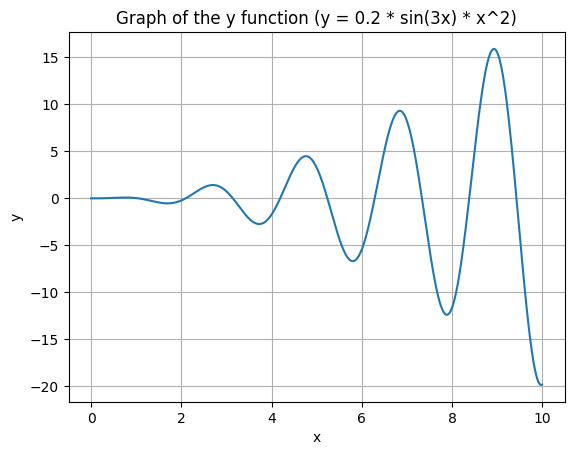

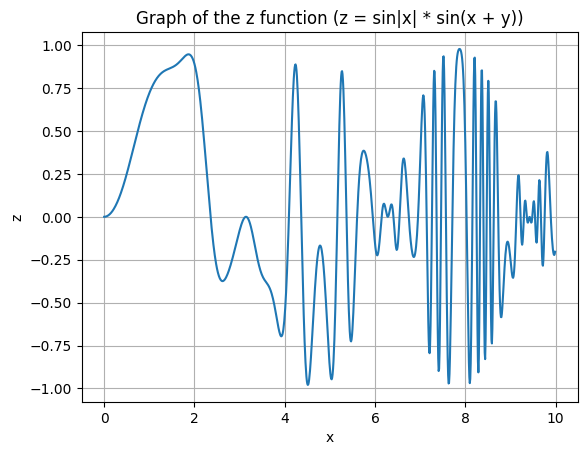

'\nplt.plot(y_values, z_values, label="z = sin|x| * sin(x + y)")\nplt.xlabel("y")\nplt.ylabel("z")\nplt.legend()\nplt.grid(True)\nplt.title("Graph of the y function (z = sin|x| * sin(x + y))")\nplt.show()\n'

In [4]:
# y func visualisation
plt.plot(x_values, y_values, label="y = 0.2 * sin(3x) * x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.title("Graph of the y function (y = 0.2 * sin(3x) * x^2)")
plt.show()

# z func visualisation (2d)
plt.plot(x_values, z_values, label="z = sin|x| * sin(x + y)")
plt.xlabel("x")
plt.ylabel("z")
plt.grid(True)
plt.title("Graph of the z function (z = sin|x| * sin(x + y))")
plt.show()

'''
plt.plot(y_values, z_values, label="z = sin|x| * sin(x + y)")
plt.xlabel("y")
plt.ylabel("z")
plt.legend()
plt.grid(True)
plt.title("Graph of the y function (z = sin|x| * sin(x + y))")
plt.show()
'''


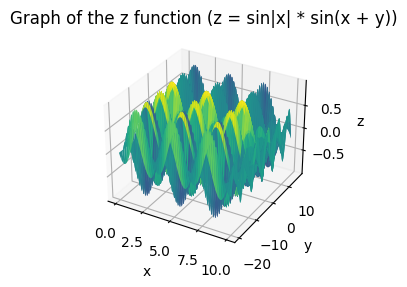

In [6]:
# z func visualisation (3d)
X, Y = np.meshgrid(x_values, y_values)
Z = z_func(X, Y)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 2, projection = "3d")
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none') # rstride=1, cstride=1, (don't need them)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Graph of the z function (z = sin|x| * sin(x + y))")
plt.show()

#Neural networks part

Functions for model testing

In [40]:
# Train and test sets
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(xy_values, z_values, test_size=0.2, random_state=42)

# Function for model testing
def Test_chosen_model(model, title_number, layers, neurons):
    # Show model info
    model.summary()

    # Compiling model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Training model
    history = model.fit(x_train_set, y_train_set, epochs=1000, batch_size=32, verbose=1,validation_data=(x_test_set, y_test_set))

    # Prediction
    z_predictions = model.predict(xy_values)

    # Plots for results
    if title_number == 1:
        title_text = f"Feed-Forward Backdrop NN ({layers} layer(s), {neurons} neuron(s))"
    if title_number == 2:
        title_text = f"Cascade-Forward Backdrop NN ({layers} layer(s), {neurons} neuron(s))"
    if title_number == 3:
        title_text = f"Elman Backdrop NN ({layers} layer(s), {neurons} neuron(s))"

    #    Plotting actual func data and predicted data
    plt.plot(x_values, z_values, label="Actual data")
    plt.plot(x_values, z_predictions, label="Predicted data")
    plt.xlabel("x")
    plt.ylabel("z")
    plt.grid(True)
    plt.title(f"Training results for {title_text}")
    plt.legend()
    plt.show()

    #    Plotting loss over epochs results
    plt.plot(history.history['loss'], label="Training loss over epochs")
    #plt.plot(history.history['val_loss'], label="Validation loss over epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f'Loss over epochs (Performance:{"%.10g"%(history.history["loss"][-1])})')
    plt.legend()
    plt.show()

'''
# Neuron number for each NN variant
ff_1 = 10
ff_2 = 20
cf_1 = 20
cf_2 = 10
elm_1 = 15
elm_2 = 5
'''

'\n# Neuron number for each NN variant\nff_1 = 10\nff_2 = 20\ncf_1 = 20\ncf_2 = 10\nelm_1 = 15\nelm_2 = 5\n'

Feedforward backdrop


In [23]:
# Sequential FFB model
def FeedForwardBackdropModel(layers, neurons):
    # Sequential model creation
    model = Sequential(name = f'Feed_forward_NN_{layers}_layers_{neurons}_neurons')

    # Adding input layer and layer #1
    model.add(Dense(neurons, activation = 'relu', input_shape=(2,)))

    # Adding additional layers if it's needed
    for i in range(layers-1):
        model.add(Dense(neurons, activation = 'relu'))

    # Adding output layer
    model.add(Dense(1, name = "output"))

    return model

Model: "Feed_forward_NN_1_layers_10_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                30        
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 2.1509 - val_loss: 1.5485
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 1.0552 - val_loss: 0.7936
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6308 - val_loss: 0.5581
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.4887 - val_los

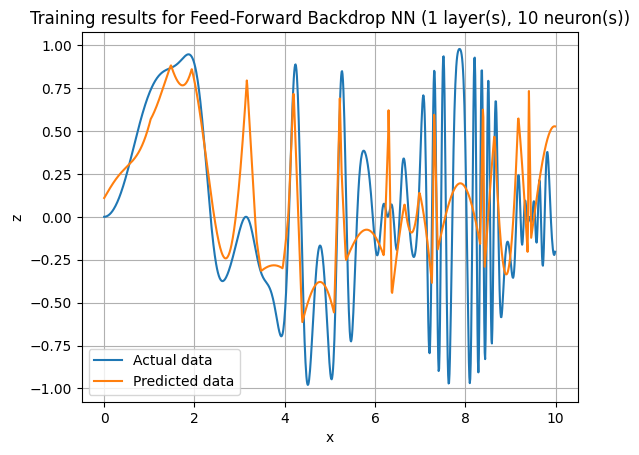

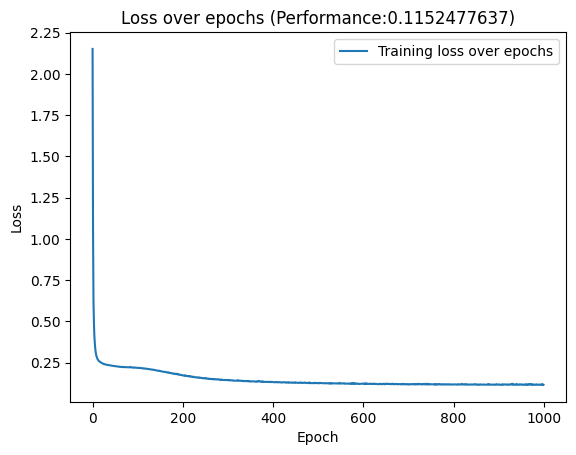

In [24]:
#   1 layer, 10 neurons
feed_forward_1 = FeedForwardBackdropModel(1, 10)
Test_chosen_model(feed_forward_1, 1, 1, 10)

Model: "Feed_forward_NN_1_layers_20_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                60        
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 1s 13ms/step - loss: 1.8526 - val_loss: 0.8907
Epoch 2/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.4902 - val_loss: 0.2950
Epoch 3/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.3028 - val_loss: 0.2673
Epoch 4/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.2879 - val_los

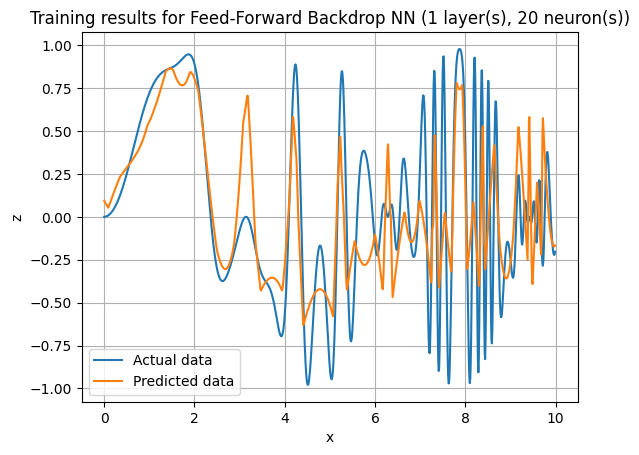

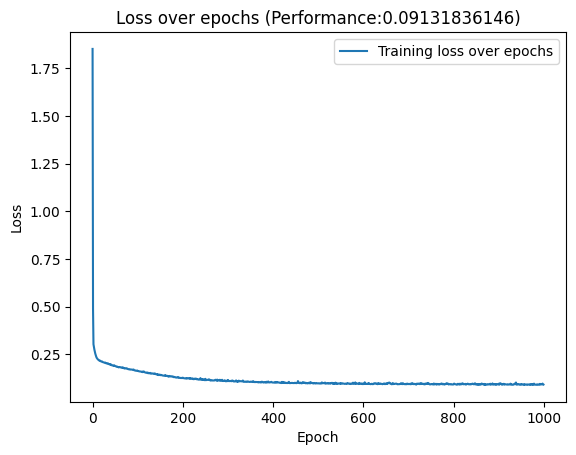

In [25]:
#   1 layer, 20 neurons
feed_forward_2 = FeedForwardBackdropModel(1, 20)
Test_chosen_model(feed_forward_2, 1, 1, 20)

Elman backdrop

In [30]:
# Sequential EB model
def ElmanBackdropModel(layers, neurons):
    # Sequential model creation
    model = Sequential(name = f'Elman_NN_{layers}_layers_{neurons}_neurons')

    # Adding input reshape layer
    model.add(Reshape((1, 2, ), input_shape = (2,), name = "input_reshape"))

    # Adding first SimpleRNN layer and input layer
    model.add(SimpleRNN(neurons, return_sequences=True, input_shape=(2,), activation = 'relu'))

    # Adding additional layers if it's needed
    for i in range(layers-1):
        model.add(SimpleRNN(neurons, return_sequences=True, activation = 'relu'))

    # Adding output reshape layer
    model.add(Reshape((neurons, ), name = "output_reshape"))

    # Adding output layer
    model.add(Dense(1, name = "output"))

    return model

Model: "Elman_NN_1_layers_15_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_reshape (Reshape)     (None, 1, 2)              0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 1, 15)             270       
                                                                 
 output_reshape (Reshape)    (None, 15)                0         
                                                                 
 output (Dense)              (None, 1)                 16        
                                                                 
Total params: 286 (1.12 KB)
Trainable params: 286 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 2s 25ms/step - loss: 3.4138 - val_loss: 2.1053
Epoch 2/1000
25/25 [===================

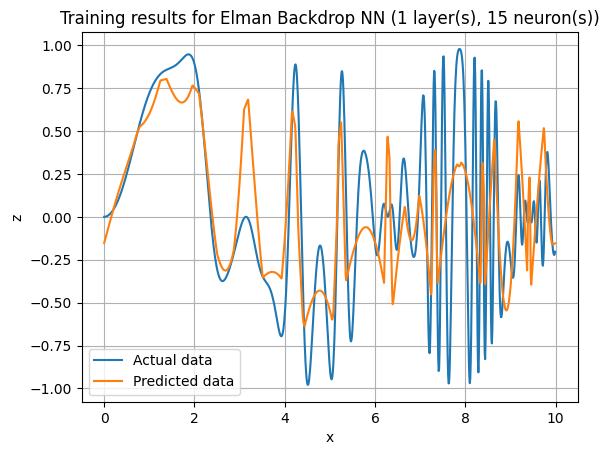

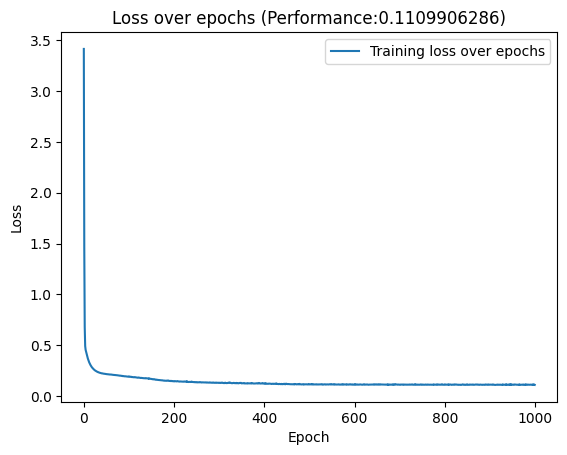

In [33]:
#   1 layer, 15 neurons
elman_backdrop_1 = ElmanBackdropModel(1, 15)
Test_chosen_model(elman_backdrop_1, 3, 1, 15)

Model: "Elman_NN_3_layers_5_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_reshape (Reshape)     (None, 1, 2)              0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 5)              40        
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 1, 5)              55        
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 1, 5)              55        
                                                                 
 output_reshape (Reshape)    (None, 5)                 0         
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 156 (624.00 Byte)
Trainab

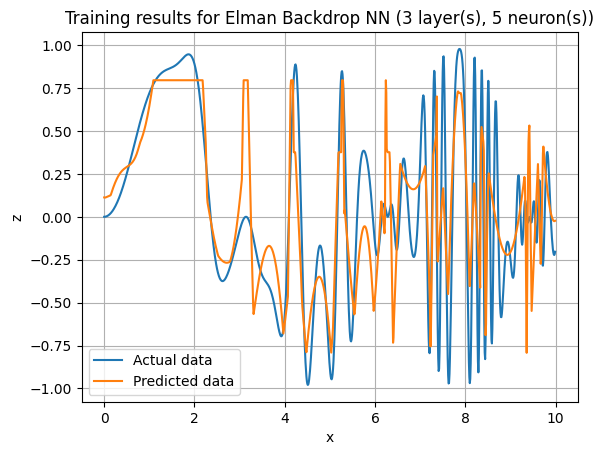

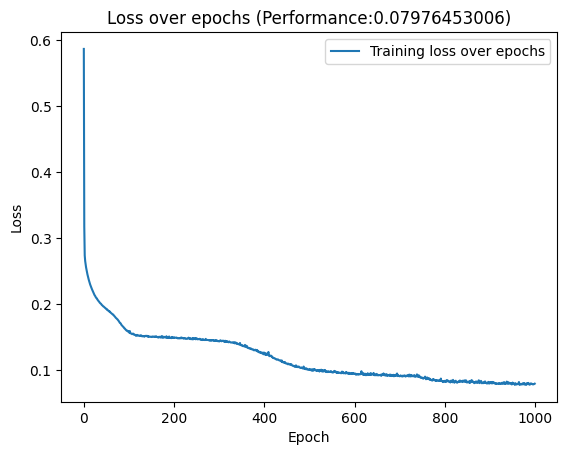

In [34]:
#   3 layers, 5 neurons per each
elman_backdrop_2 = ElmanBackdropModel(3, 5)
Test_chosen_model(elman_backdrop_2, 3, 3, 5)

Cascade-forward backdrop

In [37]:
# Sequential CFB model
def CascadeForwardBackdropModel(layers, neurons):
    # Creating input layer
    inputLayer = Input(shape=(2,), name='input')

    # Creating first layer for NN
    current = Dense(neurons, activation='relu', input_shape=(2,))(inputLayer)

    # Creating combined layers which consist of previous and current layers
    for i in range(layers-1):
        concatenatedLayer = Concatenate()([inputLayer, current])
        # Dynamic calculation of input data for Dense layer
        current = Dense(neurons, activation='relu', input_shape=(2,))(concatenatedLayer)

    # Creating output layer
    outputLayer = Dense(1, name = 'output')(current)

    # Create model with all layers created above
    model = Model(inputs=inputLayer, outputs=outputLayer, name = f'Cascade_forward_NN_{layers}_layers_{neurons}_neurons')
    return model

Model: "Cascade_forward_NN_1_layers_20_neurons"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2)]               0         
                                                                 
 dense_10 (Dense)            (None, 20)                60        
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
25/25 [==============================] - 1s 9ms/step - loss: 2.0250 - val_loss: 1.3744
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.1343 - val_loss: 0.9817
Epoch 3/1000
25/25 [==============================] - 0s

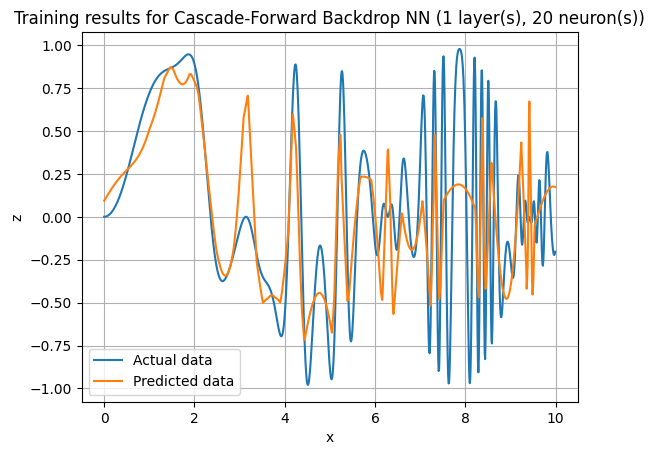

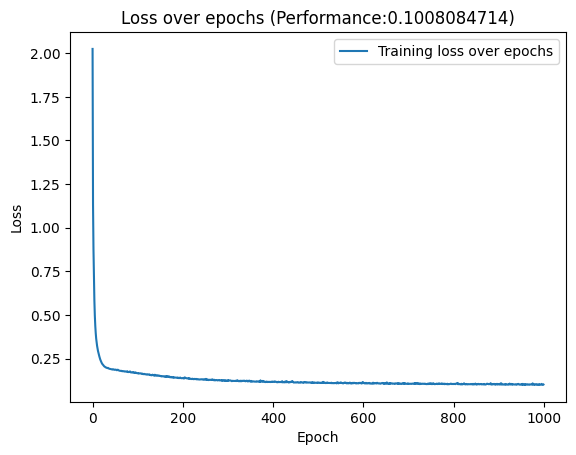

In [38]:
#   1 layer, 20 neurons
cascade_forward_1 = CascadeForwardBackdropModel(1, 20)
Test_chosen_model(cascade_forward_1, 2, 1, 20)

Model: "Cascade_forward_NN_2_layers_10_neurons"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 2)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 10)                   30        ['input[0][0]']               
                                                                                                  
 concatenate (Concatenate)   (None, 12)                   0         ['input[0][0]',               
                                                                     'dense_11[0][0]']            
                                                                                                  
 dense_12 (Dense)            (None, 10)                   130

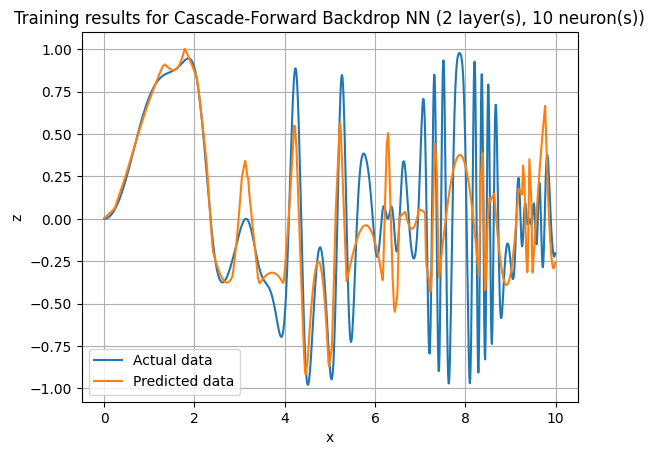

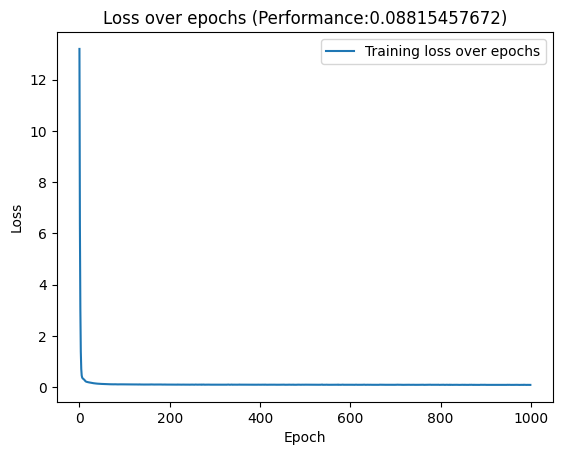

In [39]:
#   2 layers, 10 neurons per each
cascade_forward_2 = CascadeForwardBackdropModel(2, 10)
Test_chosen_model(cascade_forward_2, 2, 2, 10)